# Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones

## Facultad de Matemática Astronomía Física y Computación (UNC)

#### Proyecto de Mentoría: _Predicción de Series Temporales Financieras con Machine Learning_

---


## Trabajo Práctico 1: _Análisis y Visualización_


### Integrantes


- Juan Cruz Gonzalez
- Marcelo Fernando Fullana Jornet
- Emanuel Nicolás Herrador
- Griselda Itovich
- Ariel Maximiliano Pereira


In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import plotly.graph_objects as go

np.random.seed(0)

Note: you may need to restart the kernel to use updated packages.


### Índice


1. [Entendimiento del dataset y su dominio](#entendimiento-del-dataset-y-su-dominio)
2. [Visualización básica](#visualizacion-basica)
   1. [Cierres diarios](#cierres-diarios)
   2. [Aperturas diarias](#aperturas-diarias)
   3. [Volumen diario de acciones negociadas](#volumen-diario-de-acciones-negociadas)
3. [Visualización avanzada](#visualizacion-avanzada)
4. [Análisis de volatilidad](#analisis-de-volatilidad)
5. [Análisis de retornos](#analisis-de-retornos)
6. [Construcción de datos valiosos](#construccion-de-datos-valiosos)
   1. [Downsampling](#downsampling)
   2. [Upsampling](#upsampling)


### Entendimiento del dataset y su dominio


Lo primero que tenemos que hacer antes de trabajar con los datasets brindados es entender su naturaleza, funcionamiento, significado y estructura. Para ello, primero notemos que tenemos _dos_ datasets: `tsla_raw_data` y `tsla_split_adjusted`. ¿Qué significa cada uno?

- `tsla_raw_data` contiene información sobre las acciones de Tesla en la bolsa de valores cada día a lo largo del tiempo desde el 29 de junio de 2010 hasta el 15 de abril de 2024. Contiene toda la información _cruda_ de estas, incluyendo los precios de apertura, cierre, máximos, mínimos, volumen negociado y el porcentaje de cambio con respecto al día anterior. Además, se agregan dos columnas, las cuales son `adjusted_close` que refiere al cierre del otro dataset, y `avg_vol_20d` que es el promedio de volumen de acciones negociadas de los 20 días anteriores.
- `tsla_split_adjusted` contiene la misma información que el dataset descripto anteriormente, pero con una gran diferencia, dado que los datos han sido ajustados para que los cambios en los precios de las acciones no se vean afectados por los _splits_ que Tesla haya hecho a lo largo de la historia.

Por ello mismo, para este trabajo práctico, vamos a trabajar con el dataset `tsla_split_adjusted`, dado que los datos están ajustados y vamos a poder comparar los valores de las acciones de Tesla a lo largo del tiempo sin tener en cuenta los _splits_ que hayan hecho.


In [2]:
file_url = 'https://raw.githubusercontent.com/Emmatassone/Mentoria_FaMAF_2024/main/tsla_split_adjusted.csv'
df = pd.read_csv(file_url)

# Colocar la fecha como tipo datetime
df['date'] = pd.to_datetime(df['date'])

# Colocar los demás valores de tipo float excepto volume
float_features = ['open', 'high', 'low', 'close',
                  'raw_close', 'change_percent', 'avg_vol_20d']
int_features = ['volume']

for feature in float_features:
    df[feature] = df[feature].astype(float)
for feature in int_features:
    df[feature] = df[feature].astype(int)

# Mostrar las primeras filas del dataset para chequear
df.head()

,date,open,high,low,close,volume,raw_close,change_percent,avg_vol_20d
0,2010-06-29,1.26666,1.66666,1.16934,1.59266,281749173,23.8899,NaN,NaN
1,2010-06-30,1.71934,2.02794,1.55334,1.58866,257915884,23.8299,-0.25,NaN
2,2010-07-01,1.66666,1.72800,1.35134,1.46400,123447940,21.9600,-7.85,NaN
3,2010-07-02,1.53334,1.54000,1.24734,1.28000,77127102,19.2000,-12.57,NaN
4,2010-07-06,1.33334,1.33334,1.05534,1.07400,103189435,16.1100,-16.09,NaN


Respecto a cada campo en particular del dataset, tenemos que:

- `date`: es la fecha del día en el que se registraron los datos.
- `open`: es el precio de apertura de las acciones de Tesla en la bolsa de valores.
- `high`: es el precio máximo que alcanzaron las acciones de Tesla en la bolsa de valores.
- `low`: es el precio mínimo que alcanzaron las acciones de Tesla en la bolsa de valores.
- `close`: es el precio de cierre de las acciones de Tesla en la bolsa de valores.
- `volume`: es la cantidad de acciones de Tesla que se negociaron en la bolsa de valores.
- `raw_close`: es el precio de cierre de las acciones de Tesla en la bolsa de valores sin ajustar.
- `change_percent`: es el porcentaje de cambio del precio de cierre con respecto al día anterior.
- `avg_vol_20d`: es el promedio de volumen de acciones negociadas de los 20 días anteriores.


<a id="visualizacion-basica"></a>

### Visualización básica


En esta sección, vamos a realizar un análisis visual básico de los datos para entender cómo fue la evolución de las acciones de Tesla a lo largo del tiempo en general. Para ello, vamos a trabajar con los precios de cierre, apertura y el volumen de acciones negociadas.


#### Cierres diarios


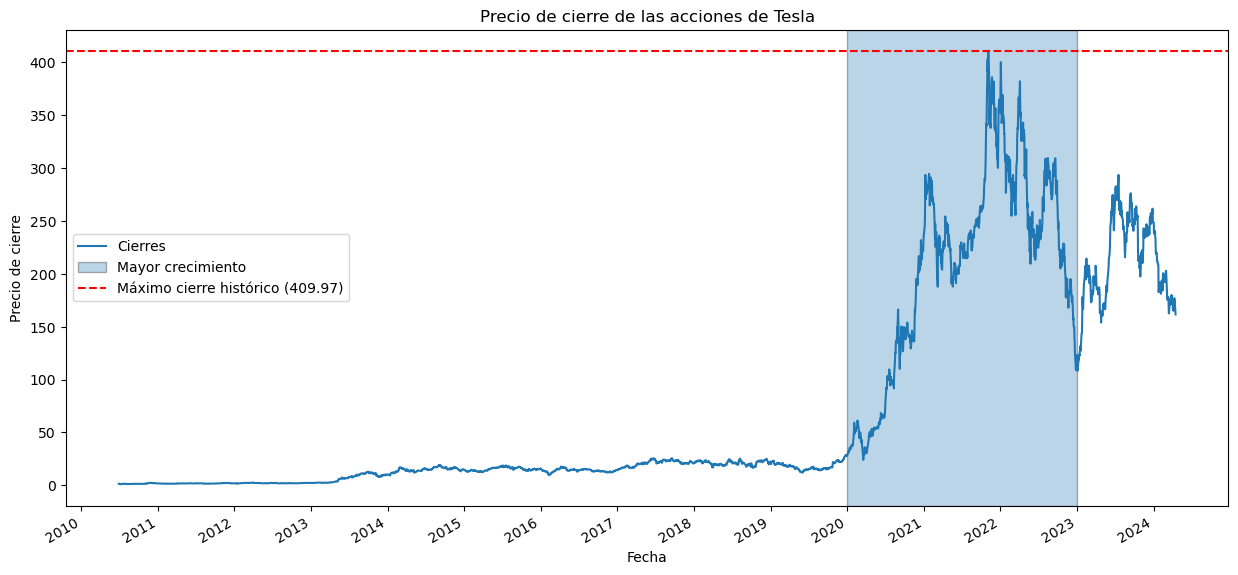

In [3]:
# Precios de cierre de las acciones de Tesla
fig, ax = plt.subplots(figsize=(15, 7))

df.plot(x='date', y='close', title='Precio de cierre de las acciones de Tesla',
        xlabel='Fecha', ylabel='Precio de cierre', x_compat=True, ax=ax, label='Cierres')

# Formatear el eje x para que muestre solo los años
ax.xaxis.set_major_locator(matplotlib.dates.YearLocator(base=1))
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%Y'))

# Encuadrar zona de mayor crecimiento (2020-2023)
plt.axvspan('2020-01-01', '2023-01-01', edgecolor='black',
            alpha=0.3, label='Mayor crecimiento')

# Mostrar el máximo
max_close = df['close'].max()
plt.axhline(max_close, color='r', linestyle='--',
            label=f'Máximo cierre histórico ({max_close})')

# Mostrar leyendas
plt.legend()

plt.show()

Podemos notar que los precios de cierre de las acciones de Tesla han tenido un crecimiento abrupto llegada la pandemia del $2020$, lo cual implica que la _pandemia_ podría haber sido un factor clave para su crecimiento (o, al menos, para el fuerte crecimiento de sus acciones). Se encuentra que en el rango $2020$ - $2023$ Tesla obtuvo su mayor crecimiento, logrando su pico de $409.97$ (datos ajustados).

Igualmente, pese a la baja obtenida a fines de $2022$ y principios de $2023$, actualmente la empresa se pudo recuperar rápidamente, pero volviendo a caer en este último año.


#### Aperturas diarias


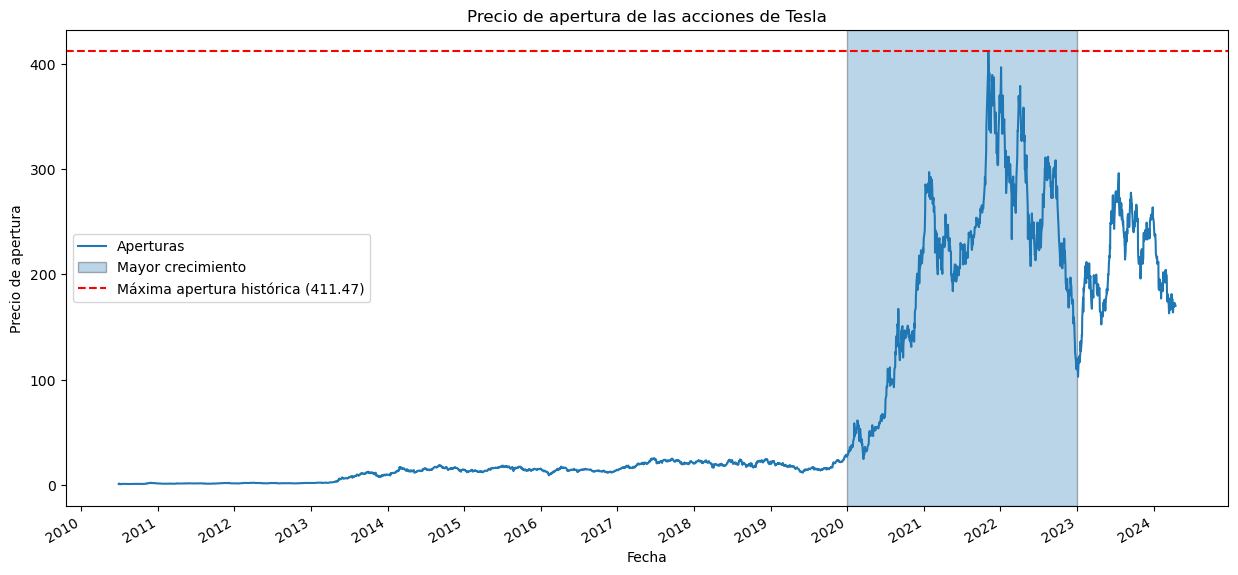

In [4]:
# Precios de apertura de las acciones de Tesla
fig, ax = plt.subplots(figsize=(15, 7))

df.plot(x='date', y='open', title='Precio de apertura de las acciones de Tesla',
        xlabel='Fecha', ylabel='Precio de apertura', x_compat=True, ax=ax, label='Aperturas')

# Formatear el eje x para que muestre solo los años
ax.xaxis.set_major_locator(matplotlib.dates.YearLocator(base=1))
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%Y'))

# Encuadrar zona de mayor crecimiento (2020-2023)
plt.axvspan('2020-01-01', '2023-01-01', edgecolor='black',
            alpha=0.3, label='Mayor crecimiento')

# Mostrar el máximo
max_open = df['open'].max()
plt.axhline(max_open, color='r', linestyle='--',
            label=f'Máxima apertura histórica ({max_open})')

# Mostrar leyendas
plt.legend()

plt.show()

Los datos de las aperturas tienen un comportamiento _muy_ similar al de los cierres, lo cual tiene sentido dado que no se espera una diferencia colosal entre un precio de apertura con el de cierre del mismo día para una empresa de este calibre. Los análisis que se pueden hacer son los mismos que los realizados para los cierres.


#### Volumen diario de acciones negociadas


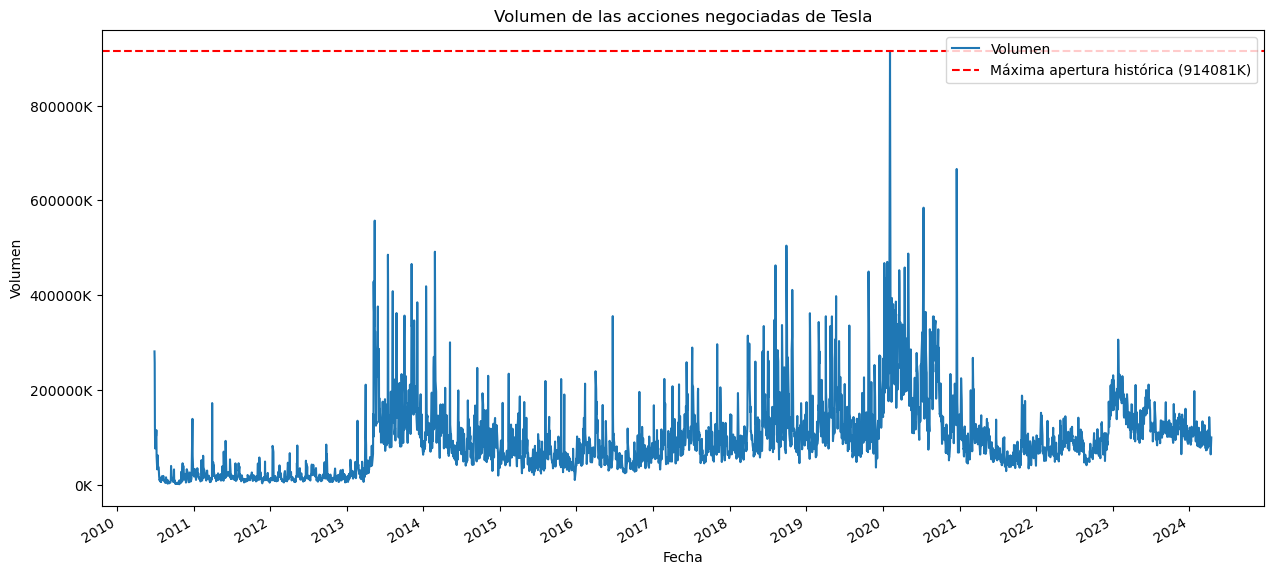

In [5]:
# Volumen de las acciones negociadas de Tesla en el mercado en el tiempo en miles
fig, ax = plt.subplots(figsize=(15, 7))

df.plot(x='date', y='volume', title='Volumen de las acciones negociadas de Tesla',
        xlabel='Fecha', ylabel='Volumen', x_compat=True, ax=ax, label='Volumen')

# Formatear el eje x para que muestre solo los años
ax.xaxis.set_major_locator(matplotlib.dates.YearLocator(base=1))
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%Y'))

# Formatear el eje y para que muestre los valores en miles con K
ax.yaxis.set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, _: f'{x/1000:.0f}K'))

# Mostrar el máximo en miles
max_volume = df['volume'].max()
plt.axhline(max_volume, color='r', linestyle='--',
            label=f'Máxima apertura histórica ({max_volume/1000:.0f}K)')

# Mostrar leyendas
plt.legend()

plt.show()

Por último, y respecto a los volúmenes de acciones negociadas, podemos notar que el volumen de acciones negociadas no presenta una constancia a lo largo del tiempo, sino que tiene muchísimos picos y valles abruptos, lo cual puede ser un indicador de que la empresa ha tenido mucha volatilidad en su historia. Además, podemos notar que los picos más altos de volumen de acciones negociadas se encuentran en los años $2013$, $2014$, $2019$ y $2020$, lo cual puede ser un indicador de que en esos años la empresa tuvo un comportamiento más volátil que en otros años.


<a id="visualizacion-avanzada"></a>

### Visualización avanzada


Para hacer un análisis más avanzado, podemos recurrir a la representación con el gráfico de _velas_ para visualizar la evolución de los precios de apertura, cierre, máximos y mínimos de las acciones de Tesla a lo largo del tiempo, y de forma conjunta.

Por lo general, este tipo de gráfico se utiliza para visualizar la evolución de los precios de un activo financiero en el mercado de valores, y se compone de una serie de barras verticales que representan los precios de apertura y cierre, y de dos líneas horizontales que representan los precios máximos y mínimos. Si la barra es de color verde, significa que el precio de cierre fue mayor al de apertura, y si es de color rojo, significa que el precio de cierre fue menor al de apertura.

Otra cosa a tener en cuenta es que en general se utilizan para el análisis técnico de los precios de los activos financieros, y se utilizan para identificar patrones y tendencias en sus precios.


In [6]:
# Gráfico de velas de las acciones de Tesla

fig = go.Figure(data=[go.Candlestick(x=df['date'], open=df['open'],
                high=df['high'], low=df['low'], close=df['close'])])

# Marcar el período de mayor crecimiento en un cuadro
fig.add_shape(type='rect', x0='2020-01-01', y0=0, x1='2023-01-01',
              y1=500, line=dict(color='black', width=2))

fig.add_annotation(x='2021-01-01', y=450,
                   text='Mayor crecimiento', showarrow=False, yshift=10)

# Marcar el máximo valor al que llegó la acción
max_value = df['high'].max()
fig.add_shape(type='line', x0=df['date'].min(), y0=max_value, x1=df['date'].max(
), y1=max_value, line=dict(color='purple', width=1, dash='dash'))

fig.add_annotation(x='2014-01-01', y=max_value,
                   text=f'Máximo histórico ({max_value:.2f})', showarrow=False, yshift=10)

# Agregar leyendas
fig.update_layout(title='Gráfico de velas de las acciones de Tesla',
                  xaxis_title='Fecha', yaxis_title='Precio', xaxis_rangeslider_visible=False)

fig.show()

Ahora, en base a lo que se puede observar en el gráfico de velas, podemos notar exactamente lo mismo que en el punto anterior respecto a los precios de cierre y apertura, pero no podemos hacer un análisis de los máximos y mínimos de las acciones a lo largo del tiempo debido a que este gráfico abarca un rango de tiempo muy grande y amplio, el cual no permite ver de forma detallada la información diaria de los activos.

Por ello mismo, podemos tratar de hacer un análisis más detallado entre a partir de $2020$, a modo de ejemplo, donde las velas sean mensuales y no diarias.


In [7]:
# Gráfico de velas de las acciones de Tesla entre 2020 y 2024, agrupadas por mes

df_nw_info = df[(df['date'] >= '2020-01-01')]
df_nw_info.loc[:, 'month'] = df_nw_info['date'].dt.to_period('M')
df_nw_info = df_nw_info.groupby('month').agg(
    {'open': 'first', 'high': 'max', 'low': 'min', 'close': 'last'})

fig = go.Figure(data=[go.Candlestick(x=df_nw_info.index.to_timestamp(
), open=df_nw_info['open'], high=df_nw_info['high'], low=df_nw_info['low'], close=df_nw_info['close'])])

# Marcar el máximo valor al que llegó la acción
max_value = df_nw_info['high'].max()
fig.add_shape(type='line', x0=df_nw_info.index.min().to_timestamp(), y0=max_value, x1=df_nw_info.index.max(
).to_timestamp(), y1=max_value, line=dict(color='purple', width=1, dash='dash'))

fig.add_annotation(x='2020-01-01', y=max_value,
                   text=f'Máximo histórico ({max_value:.2f})', showarrow=False, yshift=10)

# Agregar leyendas
fig.update_layout(title='Gráfico de velas de las acciones de Tesla entre 2020 y 2024',
                  xaxis_title='Fecha',
                  yaxis_title='Precio',
                  xaxis_rangeslider_visible=False)

fig.show()

C:\Users\emanu\AppData\Local\Temp\ipykernel_26280\2644503475.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Luego, podemos ver que en este período de mayor crecimiento se registra que los meses con crecimiento son aquellos con menor variación entre los precios extremos con los de apertura y cierre, mientras que los de mayor variación son aquellos con decrecimiento. Esto implicaría que los meses donde las acciones de Tesla no garantizan estabilidad son aquellos donde la empresa no crece, sino todo lo contrario, llegando a tener pérdidas grandes.


<a id="analisis-de-volatilidad"></a>

### Análisis de volatilidad


Antes de hacer un análisis de la volatilidad de los cierres de las acciones de Tesla, tenemos que definir precisamente qué es la volatilidad.

La volatilidad es un indicador que mide la variación del precio o de la rentabilidad de una acción u otro activo financiero a lo largo de un período de tiempo. Indica cuál es la fluctuación de la rentabilidad o del precio de un activo respecto a su media histórica para la _gestión del riesgo_ a la hora de invertir.

La volatilidad se define como la desviación estándar de los rendimientos de un activo financiero. A mayor volatilidad, mayor riesgo, y a menor volatilidad, menor riesgo. Por ello mismo, consideraremos la volatilidad mensual de los cierres de las acciones de Tesla a lo largo del tiempo, calculados como la desviación estándar de los retornos (`change_percent`) diarios de cada mes.


In [8]:
# Copiar el dataframe para no modificar el original
df_per_month = df.copy()

# Agrupar por mes
df_per_month['month'] = df_per_month['date'].dt.to_period('M')
df_per_month = df_per_month.groupby('month').agg(
    {'change_percent': 'std'}).reset_index()

# Imprimir head para chequear
df_per_month.head()

,month,change_percent
0,2010-06,NaN
1,2010-07,6.536565
2,2010-08,3.377612
3,2010-09,3.454615
4,2010-10,1.567024


Hecho esto, ya podemos graficar su distribución a lo largo del tiempo:


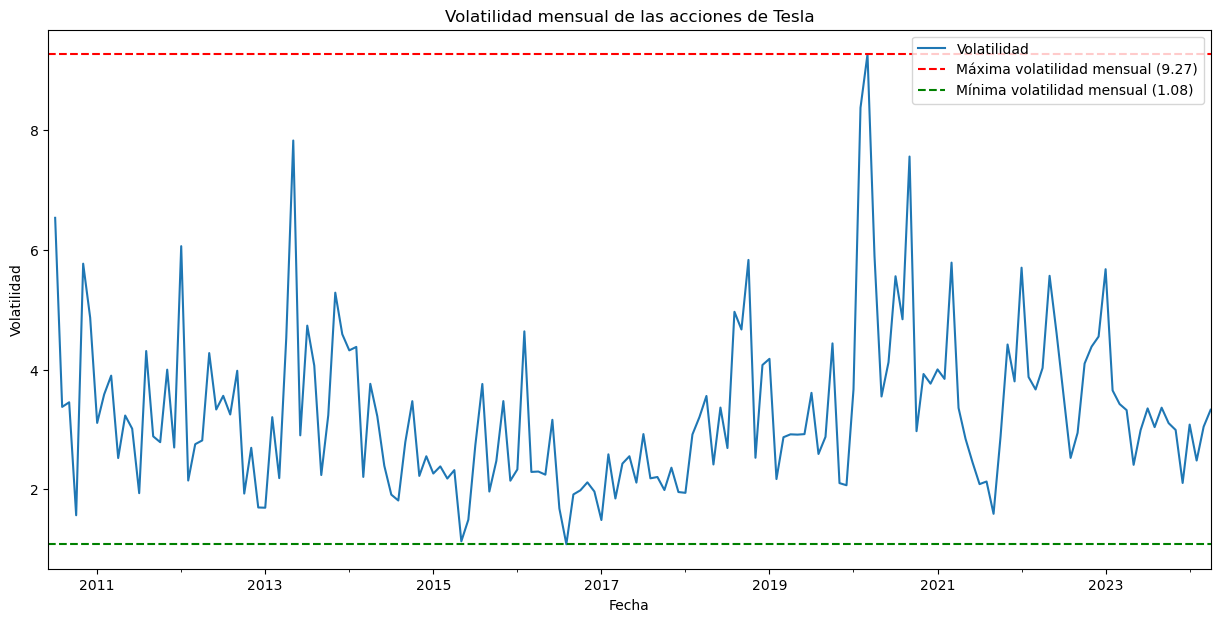

In [9]:
# Volatilidad mensual de las acciones de Tesla
fig, ax = plt.subplots(figsize=(15, 7))

df_per_month.plot(x='month', y='change_percent', title='Volatilidad mensual de las acciones de Tesla',
                  xlabel='Fecha', ylabel='Volatilidad', ax=ax, label='Volatilidad')

# Mostrar el máximo
max_volatility = df_per_month['change_percent'].max()
plt.axhline(max_volatility, color='r', linestyle='--',
            label=f'Máxima volatilidad mensual ({max_volatility:.2f})')

# Mostrar el mínimo
min_volatility = df_per_month['change_percent'].min()
plt.axhline(min_volatility, color='g', linestyle='--',
            label=f'Mínima volatilidad mensual ({min_volatility:.2f})')

# Mostrar leyendas
plt.legend()

plt.show()

Gracias a lo cual puede notarse que las acciones de Tesla han tenido una volatilidad muy alta a lo largo de su historia, con picos a destacar en los años $2013$, $2018$ y $2020$ (el más grande de todos).


<a id="analisis-de-retornos"></a>

### Análisis de retornos


<a id="construccion-de-datos-valiosos"></a>

### Construcción de datos valiosos


#### Downsampling


#### Upsampling
